VGG16

In [ ]:
# Step 1: Import necessary libraries
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset Images'

In [ ]:
# Define train and validation directories (you can also split using validation_split)
ai_art_dir = os.path.join(dataset_path, 'AiArtData/AiArtData')
real_art_dir = os.path.join(dataset_path, 'RealArt/RealArt')

In [ ]:
# Create new root folder
new_root = '/content/drive/MyDrive/Dataset Images/ArtData'
os.makedirs(new_root, exist_ok=True)

In [ ]:
# Move AI art images
ai_src = '/content/drive/MyDrive/Dataset Images/AiArtData/AiArtData'
ai_dst = os.path.join(new_root, 'AiArt')
os.makedirs(ai_dst, exist_ok=True)
for fname in os.listdir(ai_src):
    shutil.copy(os.path.join(ai_src, fname), ai_dst)

In [ ]:
# Move Real art images
real_src = '/content/drive/MyDrive/Dataset Images/RealArt/RealArt'
real_dst = os.path.join(new_root, 'RealArt')
os.makedirs(real_dst, exist_ok=True)
for fname in os.listdir(real_src):
    shutil.copy(os.path.join(real_src, fname), real_dst)

In [ ]:
# Step 3: ImageDataGenerator for loading and preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dataset_path = '/content/drive/MyDrive/Dataset Images/ArtData'

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# Step 4: Build a basic CNN model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4809 - loss: 1.5177 - val_accuracy: 0.5544 - val_loss: 0.6819
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5311 - loss: 0.6883 - val_accuracy: 0.5544 - val_loss: 0.6622
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6017 - loss: 0.6488 - val_accuracy: 0.5855 - val_loss: 0.6511
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5925 - loss: 0.6165 - val_accuracy: 0.5907 - val_loss: 0.6662
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6957 - loss: 0.5416 - val_accuracy: 0.5803 - val_loss: 0.6762


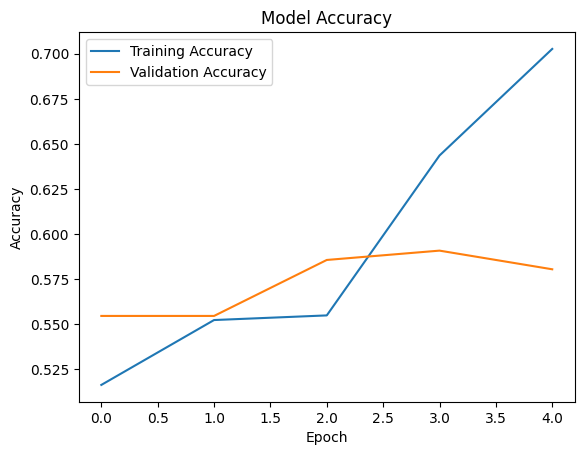

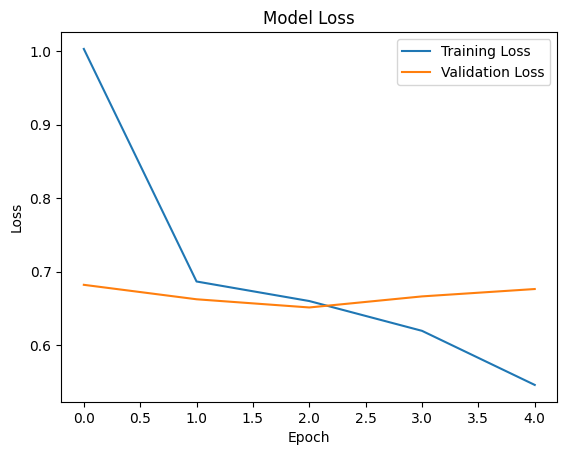

In [ ]:
# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Step 8: Evaluate model
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.5724 - loss: 0.6618

Validation Accuracy: 58.03%


EfficientNetB0

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Define dataset path (your simplified structure)
dataset_path = '/content/drive/MyDrive/Dataset Images/ArtData'

In [ ]:
# Step 3: Image preprocessing with EfficientNetB0
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# Step 4: Load EfficientNetB0 as base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Step 5: Build the complete model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 7: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5928 - loss: 0.6499 - val_accuracy: 0.7617 - val_loss: 0.4793
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8658 - loss: 0.3729 - val_accuracy: 0.7617 - val_loss: 0.4689
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9043 - loss: 0.2830 - val_accuracy: 0.7927 - val_loss: 0.4371
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 967ms/step - accuracy: 0.9317 - loss: 0.2277 - val_accuracy: 0.7720 - val_loss: 0.4567
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9439 - loss: 0.1866 - val_accuracy: 0.7927 - val_loss: 0.4906


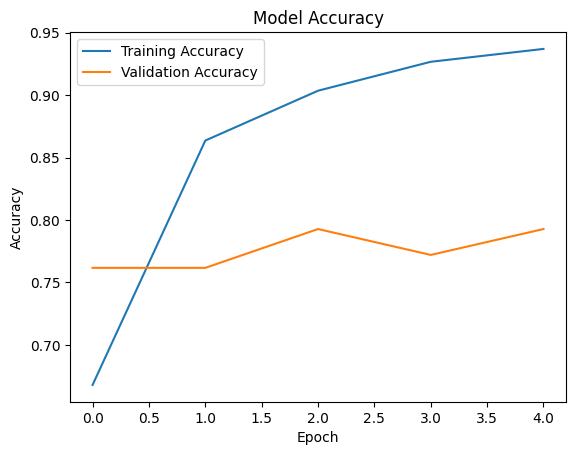

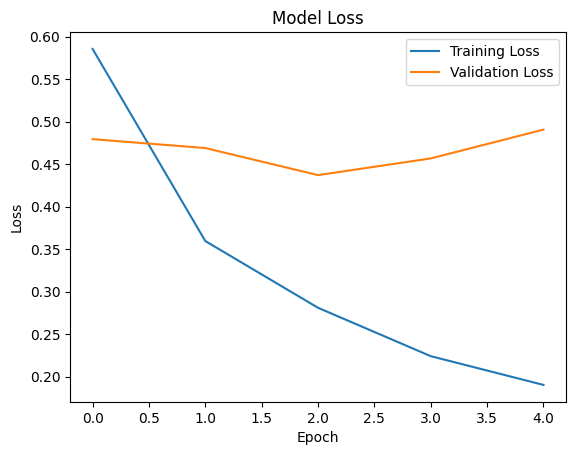

In [ ]:
# Step 8: Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 644ms/step - accuracy: 0.8535 - loss: 0.3646

Validation Accuracy: 79.27%


In [ ]:
# Step 9: Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

# Step 10: Classification report and confusion matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=['AiArt', 'RealArt']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 673ms/step - accuracy: 0.8535 - loss: 0.3646

Validation Accuracy: 79.27%
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step

Classification Report:
              precision    recall  f1-score   support

       AiArt       0.77      0.90      0.83       107
     RealArt       0.84      0.66      0.74        86

    accuracy                           0.79       193
   macro avg       0.80      0.78      0.78       193
weighted avg       0.80      0.79      0.79       193


Confusion Matrix:
[[96 11]
 [29 57]]


ResNet50

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset Images/ArtData'

In [ ]:
# Step 3: Image preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# Step 4: Load ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Step 5: Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Step 7: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/25 ━━━━━━━━━━━━━━━━━━━━ 8s 980ms/step - accuracy: 0.5650 - loss: 1.1254

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5937 - loss: 0.9894 - val_accuracy: 0.7306 - val_loss: 0.5108
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8445 - loss: 0.4059 - val_accuracy: 0.7927 - val_loss: 0.4685
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8790 - loss: 0.3170 - val_accuracy: 0.8031 - val_loss: 0.4563
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9281 - loss: 0.2177 - val_accuracy: 0.8187 - val_loss: 0.4374
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9272 - loss: 0.1991 - val_accuracy: 0.8031 - val_loss: 0.4659
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9390 - loss: 0.1548 - val_accuracy: 0.7824 - val_loss: 0.5337
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9719 - loss: 0.1307 - val_accuracy: 0.8135 - val_loss: 0.5421
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9849 - loss: 0.0733 - val_accuracy: 0.7927 - val_loss: 0.5421
Epo

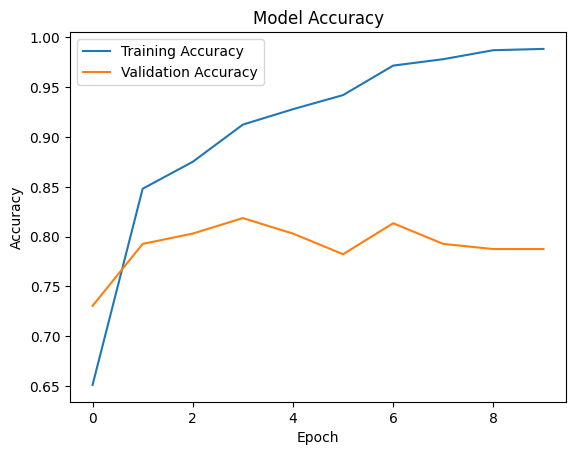

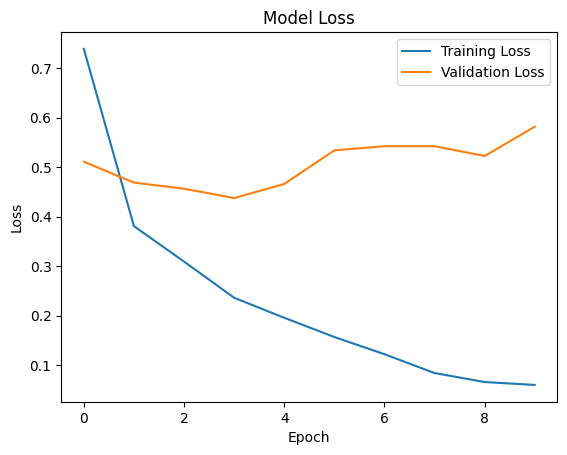

In [ ]:
# Step 8: Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Evaluate
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

# Step 10: Classification report & confusion matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=['AiArt', 'RealArt']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 528ms/step - accuracy: 0.8470 - loss: 0.3855

Validation Accuracy: 78.76%
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step

Classification Report:
              precision    recall  f1-score   support

       AiArt       0.77      0.89      0.82       107
     RealArt       0.83      0.66      0.74        86

    accuracy                           0.79       193
   macro avg       0.80      0.78      0.78       193
weighted avg       0.79      0.79      0.78       193


Confusion Matrix:
[[95 12]
 [29 57]]


In [ ]:
import os
import shutil

base_dir = "/content/drive/MyDrive/Dataset Images/ArtData"

In [ ]:
# Move AiArt images up
aiart_inner = os.path.join(base_dir, "AiArt", "AiArt")
aiart_outer = os.path.join(base_dir, "AiArt")
if os.path.exists(aiart_inner):
    for f in os.listdir(aiart_inner):
        shutil.move(os.path.join(aiart_inner, f), aiart_outer)
    os.rmdir(aiart_inner)

# Move RealArt images up
realart_inner = os.path.join(base_dir, "RealArt", "RealArt")
realart_outer = os.path.join(base_dir, "RealArt")
if os.path.exists(realart_inner):
    for f in os.listdir(realart_inner):
        shutil.move(os.path.join(realart_inner, f), realart_outer)
    os.rmdir(realart_inner)

print("✅ Folder structure fixed.")

✅ Folder structure fixed.


In [ ]:
# --- Step 2: Imports and Setup ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# --- Step 3: Data Generators ---
IMG_SIZE = (299, 299)  # InceptionV3 default
BATCH_SIZE = 32
dataset_path = base_dir

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# --- Step 4: Build Model with InceptionV3 ---
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # freeze

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# --- Step 5: Train Model ---
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 2/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5391 - loss: 0.7992   

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 391s 15s/step - accuracy: 0.5204 - loss: 0.8198 - val_accuracy: 0.6995 - val_loss: 0.6155
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7153 - loss: 0.5692 - val_accuracy: 0.7254 - val_loss: 0.5485
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8017 - loss: 0.4964 - val_accuracy: 0.7358 - val_loss: 0.5447
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8093 - loss: 0.4429 - val_accuracy: 0.6891 - val_loss: 0.5559
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7963 - loss: 0.4158 - val_accuracy: 0.7668 - val_loss: 0.4814
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8609 - loss: 0.3268 - val_accuracy: 0.7617 - val_loss: 0.4800
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8626 - loss: 0.3244 - val_accuracy: 0.7565 - val_loss: 0.4970
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9030 - loss: 0.2748 - val_accuracy: 0.7565 - val_loss: 0.4994
E

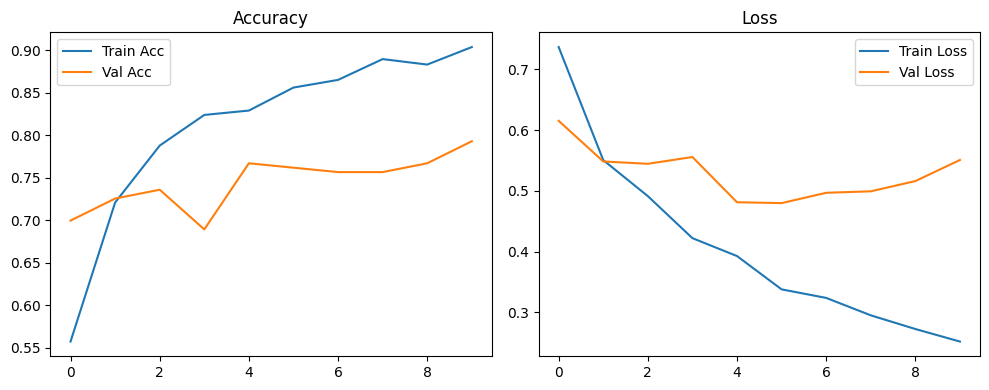

In [ ]:
# --- Step 6: Plot Accuracy & Loss ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 7: Evaluation ---
loss, accuracy = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.8507 - loss: 0.3846

✅ Validation Accuracy: 79.27%


In [ ]:
# --- Step 8: Classification Report & Confusion Matrix ---
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['AiArt', 'RealArt']))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step

📊 Classification Report:
              precision    recall  f1-score   support

       AiArt       0.76      0.93      0.83       107
     RealArt       0.87      0.63      0.73        86

    accuracy                           0.79       193
   macro avg       0.81      0.78      0.78       193
weighted avg       0.81      0.79      0.79       193


🧩 Confusion Matrix:
[[99  8]
 [32 54]]


InceptionV3

In [ ]:
# Step 1: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset Images/ArtData'

In [ ]:
# Step 3: Image preprocessing for DenseNet121
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# Step 4: Load DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze base

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Step 5: Build full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 7: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5100 - loss: 0.9477 - val_accuracy: 0.6736 - val_loss: 0.6056
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6879 - loss: 0.5610 - val_accuracy: 0.6943 - val_loss: 0.5581
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7741 - loss: 0.4677 - val_accuracy: 0.7772 - val_loss: 0.4747
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8117 - loss: 0.4054 - val_accuracy: 0.7617 - val_loss: 0.4918
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8615 - loss: 0.3307 - val_accuracy: 0.7772 - val_loss: 0.4633
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8857 - loss: 0.2832 - val_accuracy: 0.7876 - val_loss: 0.4551
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8697 - loss: 0.2785 - val_accuracy: 0.8031 - val_loss: 0.4844
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9003 - loss: 0.2351 - val_accuracy: 0.7772 - val_loss:

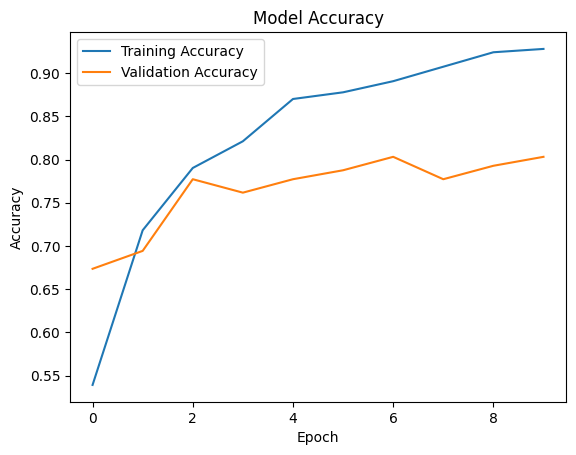

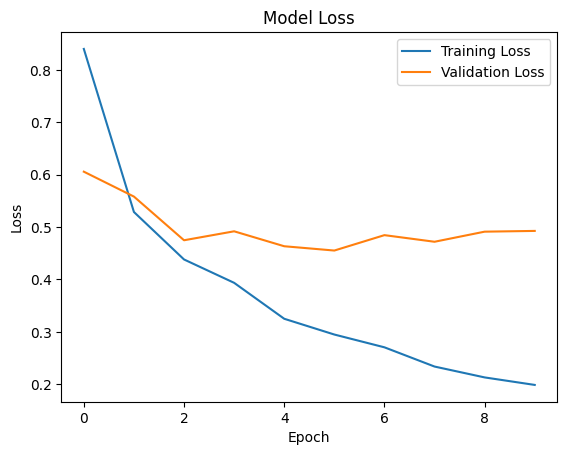

In [ ]:
# Step 8: Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Evaluate model
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.8529 - loss: 0.3633

Validation Accuracy: 80.31%


In [ ]:
# Step 10: Classification report & confusion matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=['AiArt', 'RealArt']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step

Classification Report:
              precision    recall  f1-score   support

       AiArt       0.79      0.89      0.83       107
     RealArt       0.83      0.70      0.76        86

    accuracy                           0.80       193
   macro avg       0.81      0.79      0.80       193
weighted avg       0.81      0.80      0.80       193


Confusion Matrix:
[[95 12]
 [26 60]]


EfficientNetB0

In [ ]:
# --- Step 1: Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# --- Step 2: Data Setup ---
IMG_SIZE = (224, 224)  # EfficientNetB0 input size
BATCH_SIZE = 32
dataset_path = "/content/drive/MyDrive/Dataset Images/ArtData"

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# --- Step 3: Build EfficientNetB0 Model ---
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# --- Step 4: Train Model ---
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/25 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6076 - loss: 0.6891

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6301 - loss: 0.6575 - val_accuracy: 0.7202 - val_loss: 0.4855
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8524 - loss: 0.3701 - val_accuracy: 0.7617 - val_loss: 0.4894
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8823 - loss: 0.3080 - val_accuracy: 0.7617 - val_loss: 0.4400
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9443 - loss: 0.2202 - val_accuracy: 0.8083 - val_loss: 0.4452
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9428 - loss: 0.1831 - val_accuracy: 0.8187 - val_loss: 0.4506
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9740 - loss: 0.1447 - val_accuracy: 0.8031 - val_loss: 0.4622
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9719 - loss: 0.1146 - val_accuracy: 0.7824 - val_loss: 0.4791
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9870 - loss: 0.0879 - val_accuracy: 0.7720 - val_loss: 0.5043
Epo

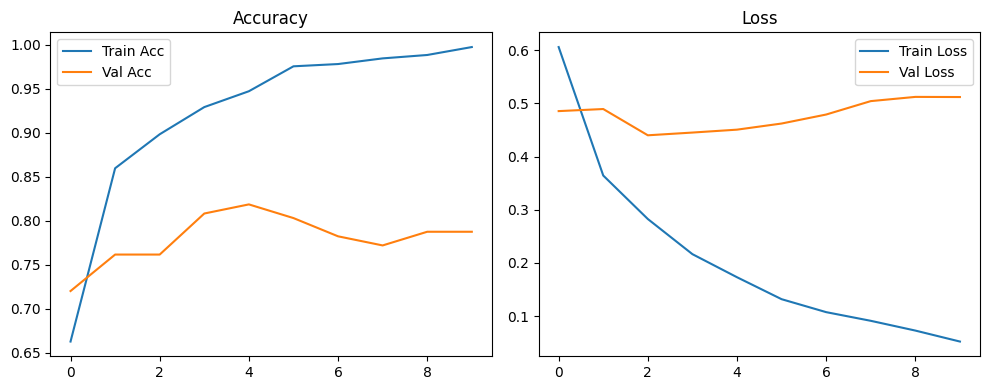

In [ ]:
# --- Step 5: Plot Results ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 6: Evaluation ---
loss, accuracy = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 676ms/step - accuracy: 0.7863 - loss: 0.4839

✅ Validation Accuracy: 78.76%


In [ ]:
# --- Step 7: Report & Confusion Matrix ---
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['AiArt', 'RealArt']))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step

📊 Classification Report:
              precision    recall  f1-score   support

       AiArt       0.82      0.79      0.80       107
     RealArt       0.75      0.79      0.77        86

    accuracy                           0.79       193
   macro avg       0.79      0.79      0.79       193
weighted avg       0.79      0.79      0.79       193


🧩 Confusion Matrix:
[[84 23]
 [18 68]]


DenseNet121

In [ ]:
# --- Step 1: Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# --- Step 2: Data Setup ---
IMG_SIZE = (224, 224)  # DenseNet121 default input
BATCH_SIZE = 32
dataset_path = "/content/drive/MyDrive/Dataset Images/ArtData"

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# --- Step 3: Build DenseNet121 Model ---
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# --- Step 4: Train Model ---
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/25 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.5812 - loss: 0.7647

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 246s 9s/step - accuracy: 0.5875 - loss: 0.7551 - val_accuracy: 0.7150 - val_loss: 0.5376
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7598 - loss: 0.4886 - val_accuracy: 0.7513 - val_loss: 0.5064
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8241 - loss: 0.3990 - val_accuracy: 0.7668 - val_loss: 0.4981
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8339 - loss: 0.3665 - val_accuracy: 0.7461 - val_loss: 0.5512
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8533 - loss: 0.3239 - val_accuracy: 0.7927 - val_loss: 0.4795
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8941 - loss: 0.2614 - val_accuracy: 0.7720 - val_loss: 0.4981
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9114 - loss: 0.2357 - val_accuracy: 0.7824 - val_loss: 0.5035
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9205 - loss: 0.2228 - val_accuracy: 0.7876 - val_loss: 0.5387
Ep

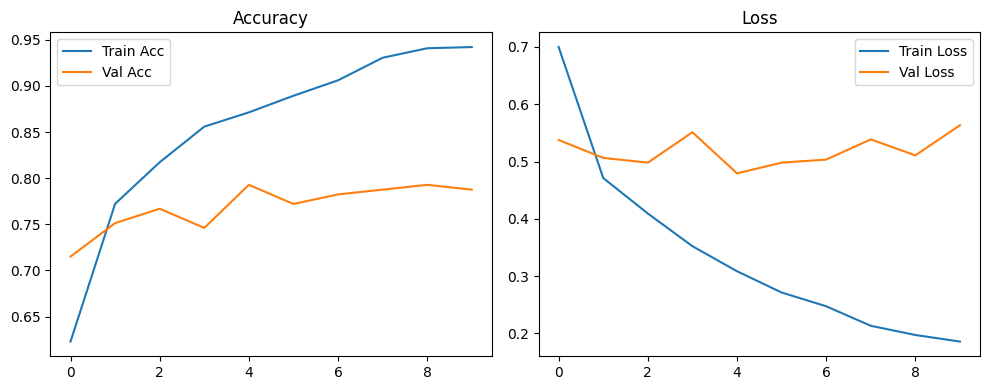

In [ ]:
# --- Step 5: Plot Accuracy & Loss ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 6: Evaluation ---
loss, accuracy = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.8434 - loss: 0.3846

✅ Validation Accuracy: 78.76%


In [ ]:
# --- Step 7: Classification Report & Confusion Matrix ---
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['AiArt', 'RealArt']))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step

📊 Classification Report:
              precision    recall  f1-score   support

       AiArt       0.77      0.88      0.82       107
     RealArt       0.82      0.67      0.74        86

    accuracy                           0.79       193
   macro avg       0.79      0.78      0.78       193
weighted avg       0.79      0.79      0.78       193


🧩 Confusion Matrix:
[[94 13]
 [28 58]]


Xception

In [ ]:
# --- Step 1: Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# --- Step 2: Data Setup ---
IMG_SIZE = (299, 299)  # Xception requires 299x299 input
BATCH_SIZE = 32
dataset_path = "/content/drive/MyDrive/Dataset Images/ArtData"

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 777 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [ ]:
# --- Step 3: Build Xception Model ---
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# --- Step 4: Train Model ---
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/25 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5348 - loss: 0.7045 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5603 - loss: 0.6852 - val_accuracy: 0.6839 - val_loss: 0.5939
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7308 - loss: 0.5129 - val_accuracy: 0.7617 - val_loss: 0.5292
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8300 - loss: 0.4017 - val_accuracy: 0.7668 - val_loss: 0.4712
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8802 - loss: 0.3188 - val_accuracy: 0.7772 - val_loss: 0.4761
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9092 - loss: 0.2647 - val_accuracy: 0.7617 - val_loss: 0.4620
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9081 - loss: 0.2481 - val_accuracy: 0.7772 - val_loss: 0.4773
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9188 - loss: 0.2202 - val_accuracy: 0.7565 - val_loss: 0.5076
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9403 - loss: 0.1925 - val_accuracy: 0.7565 - val_loss: 0.5273
Epo

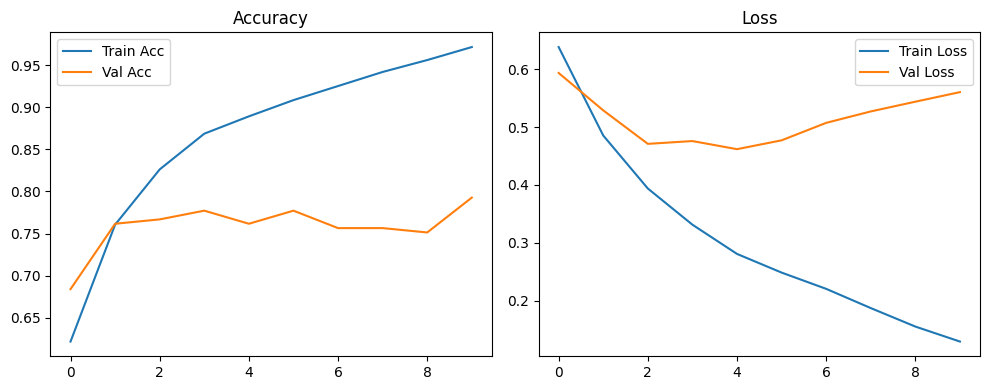

In [ ]:
# --- Step 5: Plot Accuracy & Loss ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 6: Evaluation ---
loss, accuracy = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 565ms/step - accuracy: 0.8552 - loss: 0.3792

✅ Validation Accuracy: 79.27%


In [ ]:
# --- Step 7: Classification Report & Confusion Matrix ---
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['AiArt', 'RealArt']))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

📊 Classification Report:
              precision    recall  f1-score   support

       AiArt       0.76      0.91      0.83       107
     RealArt       0.85      0.65      0.74        86

    accuracy                           0.79       193
   macro avg       0.81      0.78      0.78       193
weighted avg       0.80      0.79      0.79       193


🧩 Confusion Matrix:
[[97 10]
 [30 56]]


Model Comparison

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Dataset path
dataset_path = "/content/drive/MyDrive/Dataset Images"

In [ ]:
# Set up image generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1553 images belonging to 3 classes.
Found 387 images belonging to 3 classes.


In [ ]:
#Define a Helper Function to Build Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(base_model):
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

Assigning VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

vgg_base = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg_model = build_model(vgg_base)
vgg_model.fit(train_generator, validation_data=val_generator, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 4/49 ━━━━━━━━━━━━━━━━━━━━ 2:26 3s/step - accuracy: 0.4173 - loss: 2.4684

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 359s 7s/step - accuracy: 0.4822 - loss: 1.1568 - val_accuracy: 0.4935 - val_loss: -1.4707
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4969 - loss: -3.7540 - val_accuracy: 0.4961 - val_loss: -4.6640
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4890 - loss: -10.5699 - val_accuracy: 0.4832 - val_loss: -10.8482
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4685 - loss: -21.2400 - val_accuracy: 0.4574 - val_loss: -18.9934
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4977 - loss: -38.0560 - val_accuracy: 0.4755 - val_loss: -32.2961


Assigning ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet_model = build_model(resnet_base)
resnet_model.fit(train_generator, validation_data=val_generator, epochs=5)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4682 - loss: 5.5869 - val_accuracy: 0.5013 - val_loss: 2.5194
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4935 - loss: 2.9697 - val_accuracy: 0.5013 - val_loss: 1.2200
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4789 - loss: 0.3026 - val_accuracy: 0.5013 - val_loss: 0.8725
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4974 - loss: 0.5751 - val_accuracy: 0.5013 - val_loss: 0.0516
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5054 - loss: -0.0382 - val_accuracy: 0.5013 - val_loss: 0.0742


Assigning EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

efficientnet_base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
efficientnet_model = build_model(efficientnet_base)
efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=5)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.4911 - loss: 10.1024 - val_accuracy: 0.5013 - val_loss: 4.7343
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.4793 - loss: 0.2771 - val_accuracy: 0.5013 - val_loss: 1.5768
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4961 - loss: 0.6797 - val_accuracy: 0.5013 - val_loss: 1.0261
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4757 - loss: 0.8908 - val_accuracy: 0.5013 - val_loss: 0.2148
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4925 - loss: 0.3655 - val_accuracy: 0.5013 - val_loss: 0.2509


Assigning DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121

densenet_base = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
densenet_model = build_model(densenet_base)
densenet_model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.4893 - loss: 5.8741 - val_accuracy: 0.4858 - val_loss: -11.7187
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4912 - loss: -22.6796 - val_accuracy: 0.4832 - val_loss: -41.4335
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5027 - loss: -79.4100 - val_accuracy: 0.5013 - val_loss: -99.0400
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5107 - loss: -238.5640 - val_accuracy: 0.4341 - val_loss: -189.1169
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5133 - loss: -388.0783 - val_accuracy: 0.4884 - val_loss: -353.6414


Assigning Xception

In [ ]:
from tensorflow.keras.applications import Xception

xception_base = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
xception_model = build_model(xception_base)
xception_model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.4699 - loss: -1.6016 - val_accuracy: 0.4935 - val_loss: -25.5892
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5059 - loss: -53.6771 - val_accuracy: 0.4574 - val_loss: -75.2788
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4961 - loss: -174.2585 - val_accuracy: 0.4729 - val_loss: -168.6902
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5044 - loss: -365.4687 - val_accuracy: 0.4522 - val_loss: -314.1782
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4750 - loss: -769.5026 - val_accuracy: 0.4496 - val_loss: -515.8028


Assigning InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

inception_base = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
inception_model = build_model(inception_base)
inception_model.fit(train_generator, validation_data=val_generator, epochs=5)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.4620 - loss: 1.4411 - val_accuracy: 0.4444 - val_loss: -13.9211
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5086 - loss: -29.4250 - val_accuracy: 0.4289 - val_loss: -37.1346
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4782 - loss: -83.7745 - val_accuracy: 0.4987 - val_loss: -88.3553
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4779 - loss: -144.0904 - val_accuracy: 0.4703 - val_loss: -183.2870
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5096 - loss: -258.5894 - val_accuracy: 0.4884 - val_loss: -314.5880


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# 🧠 Step 1: Create a dictionary of models
models = {
    'VGG16': vgg_model,
    'ResNet50': resnet_model,
    'EfficientNetB0': efficientnet_model,
    'DenseNet121': densenet_model,
    'Xception': xception_model,
    'InceptionV3': inception_model
}

In [ ]:
# 📊 Step 2: Evaluate each model and store results
results = {}

# Reset the validation generator to ensure accurate predictions
val_generator.reset()

for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")
    loss, accuracy = model.evaluate(val_generator, verbose=0)

    val_generator.reset()
    y_pred_probs = model.predict(val_generator, verbose=0)
    y_pred = np.round(y_pred_probs).astype(int).flatten()
    y_true = val_generator.classes

    report = classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys(), output_dict=True)
    cm = confusion_matrix(y_true, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }



🔍 Evaluating VGG16...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔍 Evaluating ResNet50...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us


🔍 Evaluating EfficientNetB0...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us


🔍 Evaluating DenseNet121...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us


🔍 Evaluating Xception...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us


🔍 Evaluating InceptionV3...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

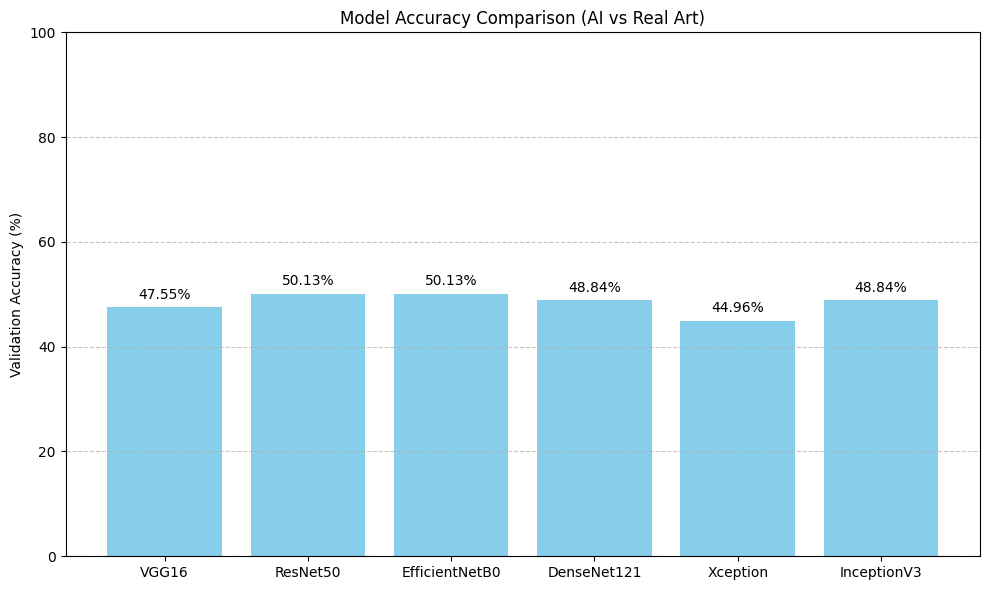

In [ ]:
# 📈 Step 3: Plot Accuracy Comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] * 100 for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel("Validation Accuracy (%)")
plt.title("Model Accuracy Comparison (AI vs Real Art)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# 🏆 Step 4: Find the best model
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"\n🏆 Best Model: {best_model[0]} with Accuracy: {best_model[1]['accuracy']*100:.2f}%")


🏆 Best Model: ResNet50 with Accuracy: 50.13%


In [ ]:
# Optional: Display detailed report
for name in model_names:
    print(f"\n📄 Classification Report for {name}:")
    print(classification_report(y_true,
                                np.round(models[name].predict(val_generator, verbose=0)).astype(int).flatten(),
                                target_names=val_generator.class_indices.keys()))


📄 Classification Report for VGG16:


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

              precision    recall  f1-score   support

   AiArtData       0.31      0.12      0.17       107
     ArtData       0.50      0.88      0.63       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.48       387
   macro avg       0.27      0.33      0.27       387
weighted avg       0.33      0.48      0.37       387


📄 Classification Report for ResNet50:


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

              precision    recall  f1-score   support

   AiArtData       0.00      0.00      0.00       107
     ArtData       0.50      1.00      0.67       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.50       387
   macro avg       0.17      0.33      0.22       387
weighted avg       0.25      0.50      0.33       387


📄 Classification Report for EfficientNetB0:


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

              precision    recall  f1-score   support

   AiArtData       0.00      0.00      0.00       107
     ArtData       0.50      1.00      0.67       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.50       387
   macro avg       0.17      0.33      0.22       387
weighted avg       0.25      0.50      0.33       387


📄 Classification Report for DenseNet121:


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

              precision    recall  f1-score   support

   AiArtData       0.26      0.08      0.13       107
     ArtData       0.50      0.91      0.65       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.48       387
   macro avg       0.25      0.33      0.26       387
weighted avg       0.32      0.48      0.36       387


📄 Classification Report for Xception:


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

              precision    recall  f1-score   support

   AiArtData       0.28      0.17      0.21       107
     ArtData       0.51      0.85      0.64       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.47       387
   macro avg       0.26      0.34      0.28       387
weighted avg       0.33      0.47      0.38       387


📄 Classification Report for InceptionV3:


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


              precision    recall  f1-score   support

   AiArtData       0.43      0.08      0.14       107
     ArtData       0.50      0.95      0.66       194
     RealArt       0.00      0.00      0.00        86

    accuracy                           0.50       387
   macro avg       0.31      0.34      0.27       387
weighted avg       0.37      0.50      0.37       387



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
